# PHP - Pulsating Heat Pipe [Al2O3, 40FR]
Data collection and preparation for data analysis and machine learning 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import missingno as msno
sns.set()
import glob
from mdf import mdf

# Using MDF functions

Loading mdf class

In [2]:
mdf('data/al2o3_diwater_exp/40_FR/')

Loading data from: data/al2o3_diwater_exp/40_FR/


loading data and converting to MKS system

In [3]:
# loading and preparing data
df, df_conv = mdf.DataETL('data/al2o3_diwater_exp/40_FR/')

Compiled and converted data is saved at: data/al2o3_diwater_exp/40_FR/'combined_converted_data.csv'


In [4]:
df_conv

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W]
0,0.0,296.816667,296.40,0.416667,0.313307,0.005208
1,0.5,297.816667,296.40,1.416667,0.313307,0.017708
2,1.0,297.816667,296.40,1.416667,0.313307,0.017708
3,1.5,298.150000,296.15,2.000000,0.313307,0.025000
4,2.0,299.150000,296.40,2.750000,0.313307,0.034375
...,...,...,...,...,...,...
422,58.0,366.150000,332.90,33.250000,0.613283,0.415625
423,58.5,366.150000,332.40,33.750000,0.613283,0.421875
424,59.0,366.150000,332.40,33.750000,0.613283,0.421875
425,59.5,366.350000,332.15,34.200000,0.613283,0.427500


GFE calculation and DF preparation

In [5]:
# GFE calculation
df_gfe = mdf.GibbsFE(df_conv, "data/al2o3_diwater_exp/40_FR/")

Gibbs Free Energy calculated data saved at: data/al2o3_diwater_exp/40_FR/'gfe_combined.csv


In [6]:
df_gfe

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,0.0,296.816667,296.40,0.416667,0.313307,0.005208,-2863.978655,-2859.958246,-4.020409
1,0.5,297.816667,296.40,1.416667,0.313307,0.017708,-2873.627637,-2859.958246,-13.669391
2,1.0,297.816667,296.40,1.416667,0.313307,0.017708,-2873.627637,-2859.958246,-13.669391
3,1.5,298.150000,296.15,2.000000,0.313307,0.025000,-2876.843964,-2857.546001,-19.297964
4,2.0,299.150000,296.40,2.750000,0.313307,0.034375,-2886.492946,-2859.958246,-26.534700
...,...,...,...,...,...,...,...,...,...
422,58.0,366.150000,332.90,33.250000,0.613283,0.415625,-1488.384689,-1353.224807,-135.159882
423,58.5,366.150000,332.40,33.750000,0.613283,0.421875,-1488.384689,-1351.192328,-137.192362
424,59.0,366.150000,332.40,33.750000,0.613283,0.421875,-1488.384689,-1351.192328,-137.192362
425,59.5,366.350000,332.15,34.200000,0.613283,0.427500,-1489.197681,-1350.176088,-139.021593


# General Raw Data Visualisation

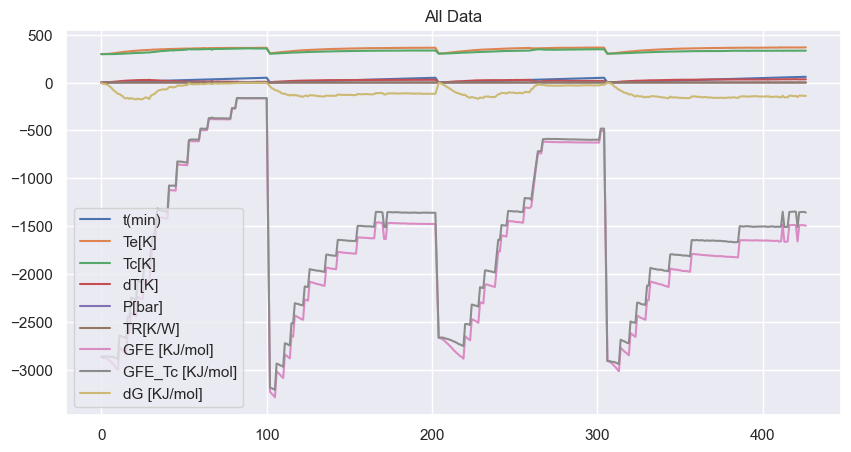

In [7]:
# plotting all data
mdf.PlotAllData(df_gfe)

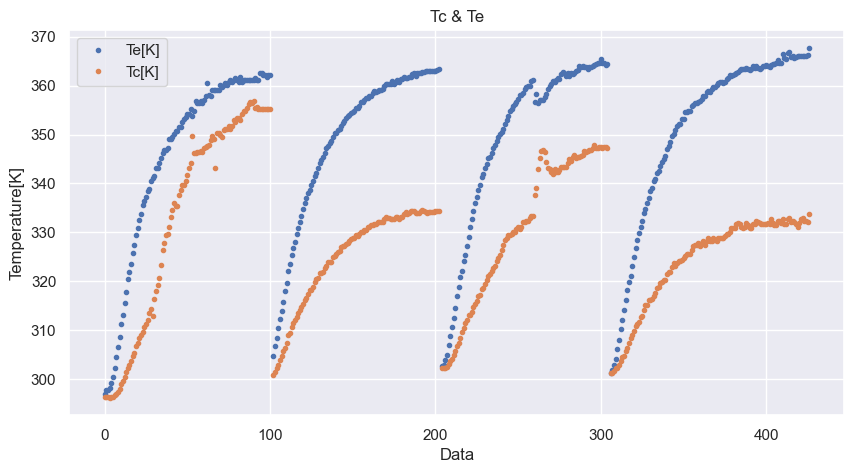

In [8]:
# plotting raw converted data of Tc and Te
mdf.PlotTempData(df_gfe)

# Data Analysis

Data selection (chopping) as per Te temperature

In [9]:
df_selected = mdf.DataChop(df_gfe,300,400)

Optimal range of temperature(Te) for data selection: [Tmin:296.8167, Tmax:368]


In [10]:
df_selected

,t(min),Te[K],Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
5,2.5,300.483333,296.40,4.083333,0.313307,0.051042,-2899.358256,-2859.958246,-39.400010
6,3.0,302.150000,296.65,5.500000,0.313307,0.068750,-2915.439892,-2862.370492,-53.069401
7,3.5,304.483333,296.90,7.583333,0.313307,0.094792,-2937.954183,-2864.782737,-73.171446
8,4.0,306.483333,297.40,9.083333,0.313307,0.113542,-2957.252147,-2869.607228,-87.644919
9,4.5,308.483333,297.90,10.583333,0.313307,0.132292,-2976.550111,-2874.431719,-102.118392
...,...,...,...,...,...,...,...,...,...
422,58.0,366.150000,332.90,33.250000,0.613283,0.415625,-1488.384689,-1353.224807,-135.159882
423,58.5,366.150000,332.40,33.750000,0.613283,0.421875,-1488.384689,-1351.192328,-137.192362
424,59.0,366.150000,332.40,33.750000,0.613283,0.421875,-1488.384689,-1351.192328,-137.192362
425,59.5,366.350000,332.15,34.200000,0.613283,0.427500,-1489.197681,-1350.176088,-139.021593


Data re-arrange, grouping and caculation for mean & std

In [11]:
df_mean, df_std = mdf.DataArrange(df_selected, 'data/al2o3_diwater_exp/40_FR/')

Calculated mean and standard deviation values saved at data/al2o3_diwater_exp/40_FR/'combined_mean.csv' and 'combined_std.csv'


In [12]:
df_mean

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
0,300.483333,2.5,296.40,4.083333,0.313307,0.051042,-2899.358256,-2859.958246,-39.400010
1,301.150000,0.0,301.15,0.000000,0.313307,0.000000,-2905.790910,-2905.790910,0.000000
2,301.750000,0.5,301.15,0.600000,0.313307,0.007500,-2911.580299,-2905.790910,-5.789389
3,302.150000,3.0,296.65,5.500000,0.313307,0.068750,-2915.439892,-2862.370492,-53.069401
4,302.550000,0.0,302.15,0.400000,0.346638,0.005000,-2665.002242,-2661.478854,-3.523388
...,...,...,...,...,...,...,...,...,...
204,366.350000,59.5,332.15,34.200000,0.613283,0.427500,-1489.197681,-1350.176088,-139.021593
205,366.550000,52.0,332.65,33.900000,0.579952,0.423750,-1660.306186,-1506.754474,-153.551711
206,366.750000,53.5,332.65,34.100000,0.579952,0.426250,-1661.212095,-1506.754474,-154.457621
207,366.950000,54.0,332.90,34.050000,0.579952,0.425625,-1662.118005,-1507.886862,-154.231143


In [13]:
df_std

,Te[K],t(min),Tc[K],dT[K],P[bar],TR[K/W],GFE [KJ/mol],GFE_Tc [KJ/mol],dG [KJ/mol]
5,302.75,0.353553,0.353553,0.353553,0.023568,0.004419,179.934172,176.166142,3.768030
44,322.15,1.060660,0.530330,0.530330,0.000000,0.006629,0.000000,4.671396,4.671396
50,325.35,1.060660,0.530330,0.530330,0.000000,0.006629,0.000000,4.671396,4.671396
52,326.75,1.060660,0.353553,0.353553,0.023568,0.004419,176.355502,170.915107,5.440395
63,331.15,0.353553,0.353553,0.353553,0.023568,0.004419,163.692426,157.391999,6.300427
...,...,...,...,...,...,...,...,...,...
196,364.35,1.554563,8.951257,8.951257,0.144966,0.111891,628.419677,558.355815,70.153123
197,364.55,1.704336,8.223985,8.223985,0.129702,0.102800,565.673497,501.758831,63.996363
201,365.75,2.121320,0.353553,0.353553,0.023568,0.004419,120.154300,107.514764,12.639536
202,365.95,1.060660,0.353553,0.353553,0.023568,0.004419,120.220003,110.553381,9.666621


Calculating of average value of all thermal properties

# Data Visualisation after Data Analysis

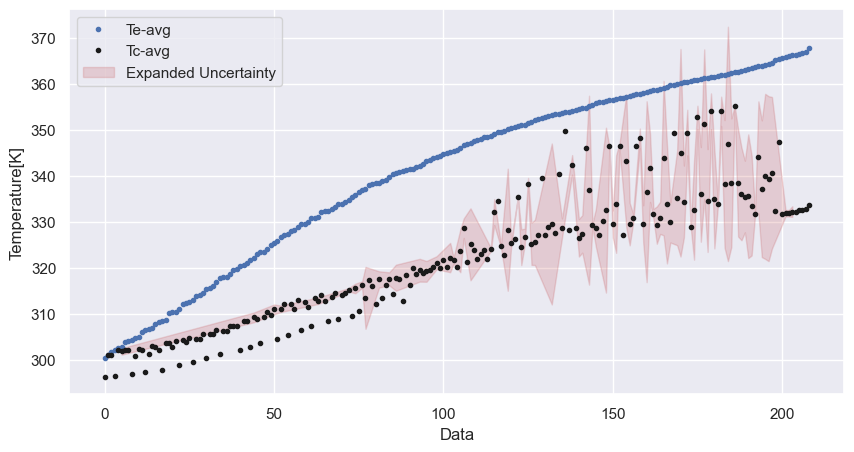

In [14]:
# plotting EU for Tc and Te
mdf.PlotEUTemp(df_mean, df_std)

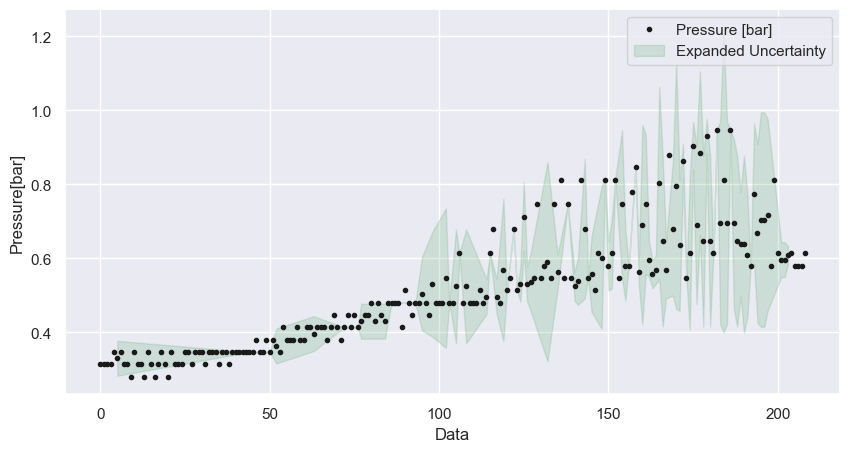

In [15]:
# plotting pressure
mdf.PlotEUPres(df_mean, df_std)

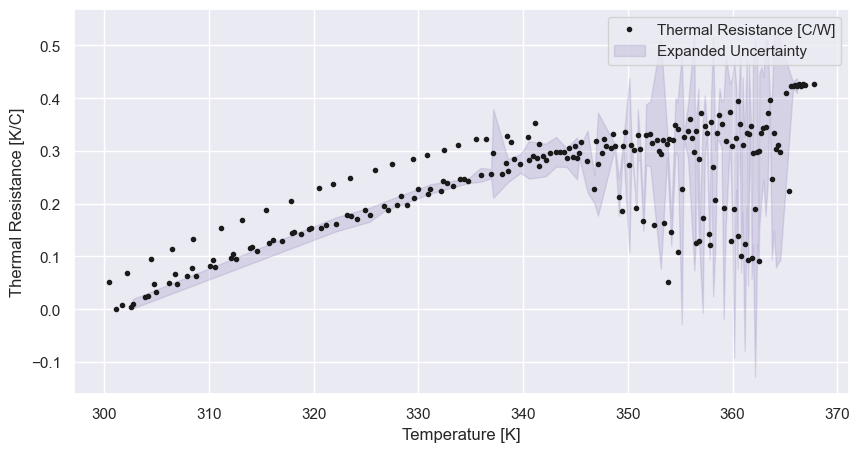

In [16]:
# plotting TR
mdf.PlotEUTR(df_mean,df_std)

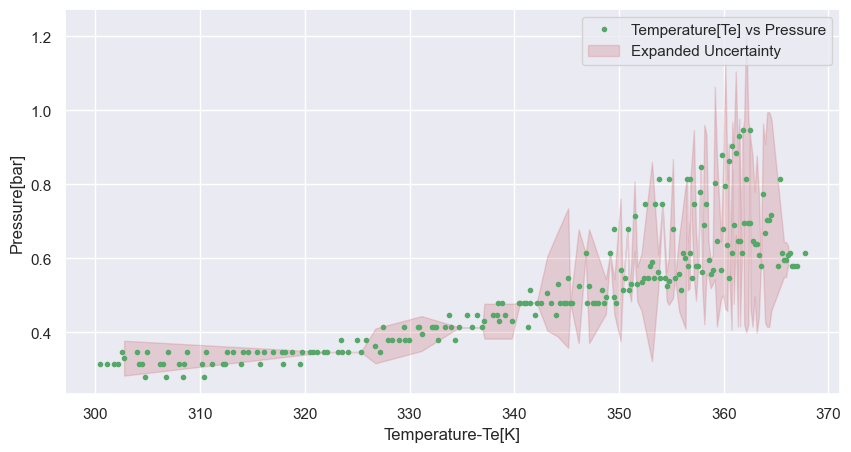

In [17]:
# plotting TP graph
mdf.PlotEUTP(df_mean,df_std)

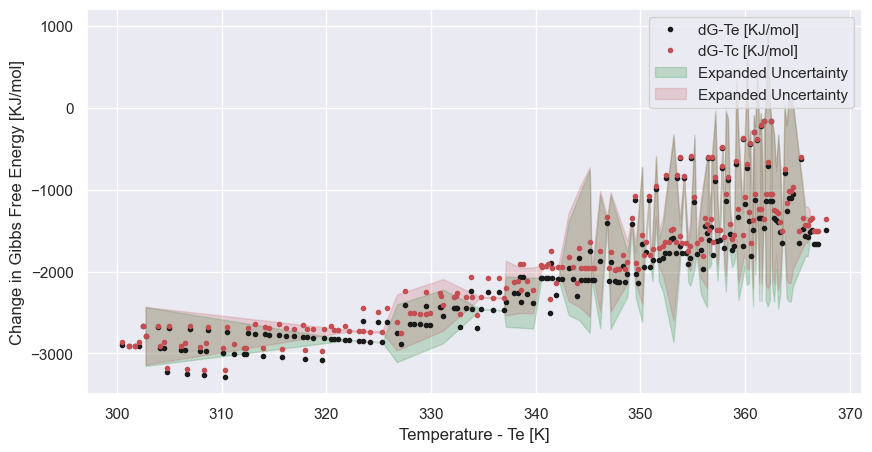

In [18]:
# plotting GFE at Te and Tc
mdf.PlotEUGFE(df_mean, df_std)

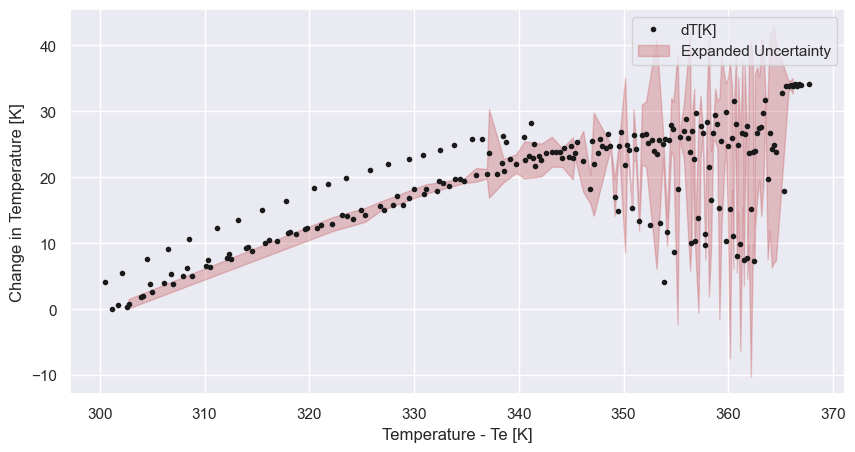

In [19]:
# plotting dT
mdf.PlotEUdT(df_mean, df_std)

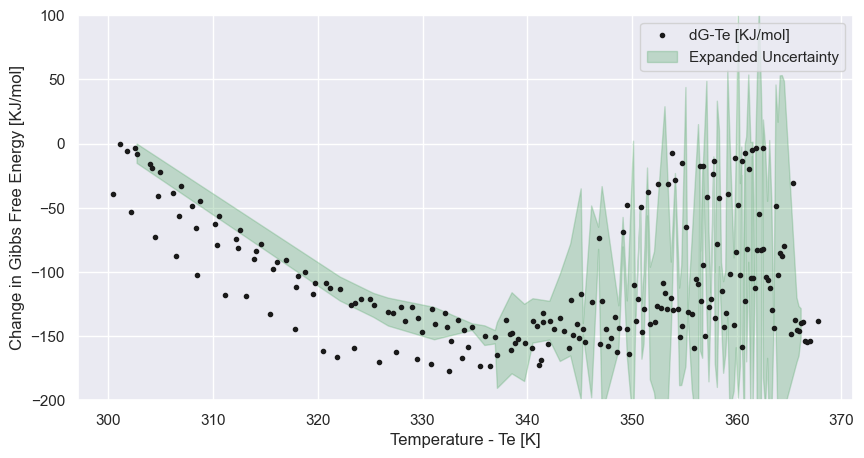

In [20]:
# plotting dG
mdf.PlotEUdG(df_mean, df_std)

# Data Analysis Result

In [21]:
mdf.DataPropAvg(df_mean, df_std)

Tc  average:     321.8592 +- 3.1745 [K]
P   average:     0.5127 +- 0.053 [bar]
dT  average:     19.3065 +- 3.1745 [K]
TR  average:     0.2413 +- 0.0397 [K/W]
GFE average:     -1988.4448 +- 243.1683 [KJ/mol]



Finding best G(T,P) with lowest dG value

In [22]:
mdf.BestTP(df_mean)

Optimal G(T,P) condition at lowest (optimal) dG[-176.9189]
Te optimal:        332.4833[K] 
P  optimal:        0.4133[bar] 
dT optimal:        24.0833[K] 
TR optimal:        0.301[K/W] 
GFE optimal:       dG(332.4833, 0.4133) = -2442.4604 [KJ/mol]

